In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Temp Data
Source: https://www.ncei.noaa.gov/products/land-based-station/noaa-global-temp

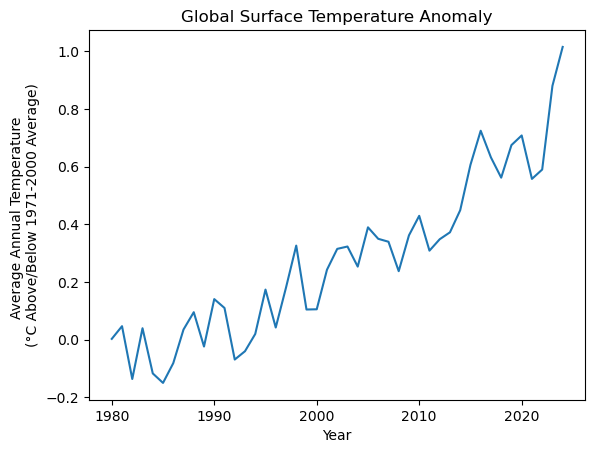

In [14]:
freq = 'ann'
area = 'land_ocean'
limits = '90S.90N'
yyymm = '202402'
url = f'https://www.ncei.noaa.gov/data/noaa-global-surface-temperature/v6/access/timeseries/aravg.{freq}.{area}.{limits}.v6.0.0.{yyymm}.asc'

temps = pd.read_csv(url, header=None, delimiter=r'\s+')
temps.columns = ['year', 'temp_anomaly', 'error1', 'error2', 'error3', 'error4']
temps = temps[temps.year >= 1980]

plt.figure()
plt.plot(temps['year'], temps['temp_anomaly'])
plt.title('Global Surface Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Average Annual Temperature \n(\u00B0C Above/Below 1971-2000 Average)')
plt.show()

## Accumulated Cyclone Energy (ACE) Index Data
Source: https://www.epa.gov/climate-indicators/climate-change-indicators-tropical-cyclone-activity

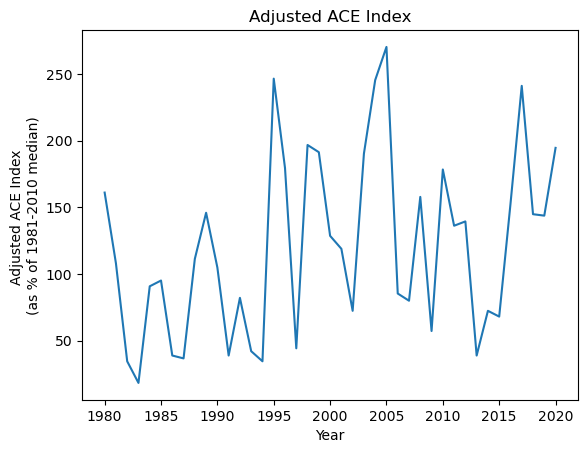

In [21]:
url = 'https://www.epa.gov/sites/default/files/2021-04/cyclones_fig-2.csv'

ace = pd.read_csv(url, encoding='cp1252', skiprows=6)
ace.columns = ['year', 'ace']
ace = ace[ace.year >= 1980]

plt.figure()
plt.plot(ace['year'], ace['ace'])
plt.title('Adjusted ACE Index')
plt.xlabel('Year')
plt.ylabel('Adjusted ACE Index \n(as % of 1981-2010 median)')
plt.show()

https://psl.noaa.gov/gcos_wgsp/Timeseries/Hurricane/

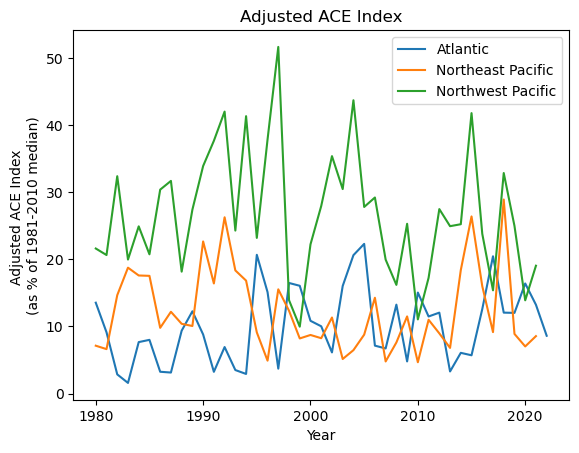

In [57]:
regions = ['atl', 'nepac', 'nwpac']
ace = pd.DataFrame()

for region in regions:
    url = f'https://psl.noaa.gov/gcos_wgsp/Timeseries/Hurricane/hurr.{region}.ace.data'
    df = pd.read_csv(url, header=None, delimiter=r'\s+', skiprows=1).dropna(how='any').apply(pd.to_numeric)
    df = df.set_index(0, drop=True)
    df[f'ace_{region}'] = df.apply(lambda x: x[1:].mean(), axis=1)
    ace = pd.merge(ace, df[[f'ace_{region}']], left_index=True, right_index=True, how='outer')

ace = ace[ace.index >= 1980]

plt.figure()
plt.plot(ace.index, ace['ace_atl'], label='Atlantic')
plt.plot(ace.index, ace['ace_nepac'], label='Northeast Pacific')
plt.plot(ace.index, ace['ace_nwpac'], label='Northwest Pacific')
plt.legend()
plt.title('Adjusted ACE Index')
plt.xlabel('Year')
plt.ylabel('Adjusted ACE Index \n(as % of 1981-2010 median)')
plt.show()